In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [32]:
post_df_full = pd.read_excel("Data/warriors_clean.xlsx")

In [33]:
post_df_full1=post_df_full
post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )
# Merge cột vào dataframe
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_full_with_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,"""He's a true hooper, so obviously he's going t...",401.0,319.0,NaN,2.0,NaN,NaN,11.0,13,18,733
1,In-Season Tournament matchup against the Kings...,1311.0,975.0,1.0,5.0,1.0,NaN,36.0,38,38,2329
2,"The Dubs have 44 dunks so far this season, res...",891.0,475.0,1.0,6.0,NaN,NaN,11.0,20,24,1384
3,Play that back one time ▶️\n\nVerizon || Plays...,2902.0,1709.0,5.0,25.0,NaN,2.0,50.0,57,32,4693
4,"""Yes, sir. Yes, sir. Yes, sir!""\n\nStephen Cur...",2062.0,1733.0,25.0,3.0,NaN,1.0,40.0,120,59,3864
...,...,...,...,...,...,...,...,...,...,...,...
115,Career-high points for the rook before the half,13881.0,10085.0,19.0,31.0,2.0,2.0,194.0,292,300,24214
116,"Behind-the-back to the rack\nthat's nice, Dari...",2590.0,1418.0,NaN,11.0,NaN,1.0,33.0,59,59,4053
117,12 points in 12 minutes\nBrandin' is BALLING\n...,2240.0,1428.0,1.0,7.0,NaN,1.0,39.0,81,70,3716
118,Tough bucket,6821.0,4525.0,23.0,24.0,3.0,3.0,74.0,139,172,11473


Tìm bài viết chứa 1 từ khóa nào đó

In [34]:
a=post_df_full_with_reactions['post_text'].tolist()
print("có tất cả ",len(a),"bài viết")
res=[]
for i in a :
  if "Steph" in i: res.append(i)
print(len(res),"bài viết chưa từ khóa trên")
res

có tất cả  120 bài viết
13 bài viết chưa từ khóa trên


['"Yes, sir. Yes, sir. Yes, sir!"\n\nStephen Curry was mic\'d up earlier this year in Sacramento 🤣\n\nVâng, thưa ngài. Vâng, thưa ngài. Vâng, thưa ngài! "\n\nStephen Curry đã thức dậy sớm hơn năm nay ở Sacramento 🤣',
 "Same spot, same shot, same sauce.\n\nStephen Curry's greatest lookaway threes from the left corner 🤯",
 'Steph\nGonna\nSteph',
 'Players with 80+ threes through their first 15 games in a season in NBA history:\n\n👌 Stephen Curry (2021) - 85 threes\n👌 Stephen Curry (2018) - 80 threes\n👌 Stephen Curry (2023) 80 threes\n\nNhững cầu thủ có hơn 80 ba thông qua 15 trận đầu tiên trong một mùa giải trong lịch sử NBA:\n\n👌 Stephen Curry (2021) - 85 ba\n👌 Stephen Curry (2018) - 80 ba\n👌 Stephen Curry (2023) 80 ba',
 'Stephen Curry never stops moving ⚡️\n\nStephen Curry không bao giờ ngừng di chuyển ⚡️',
 'Steph\nGonna\nSTEPH',
 'Stephen knew it was good 🤯\n\nStephen biết điều đó là tốt 🤯',
 'Last time we played San Antonio, Stephen took the jump 💪\n\nLần cuối cùng chúng tôi chơi S

In [35]:
post_df_full_with_reactions['post_text']
text = "" 
for i in post_df_full_with_reactions['post_text']:
  text=text+i+"\n"

In [36]:
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

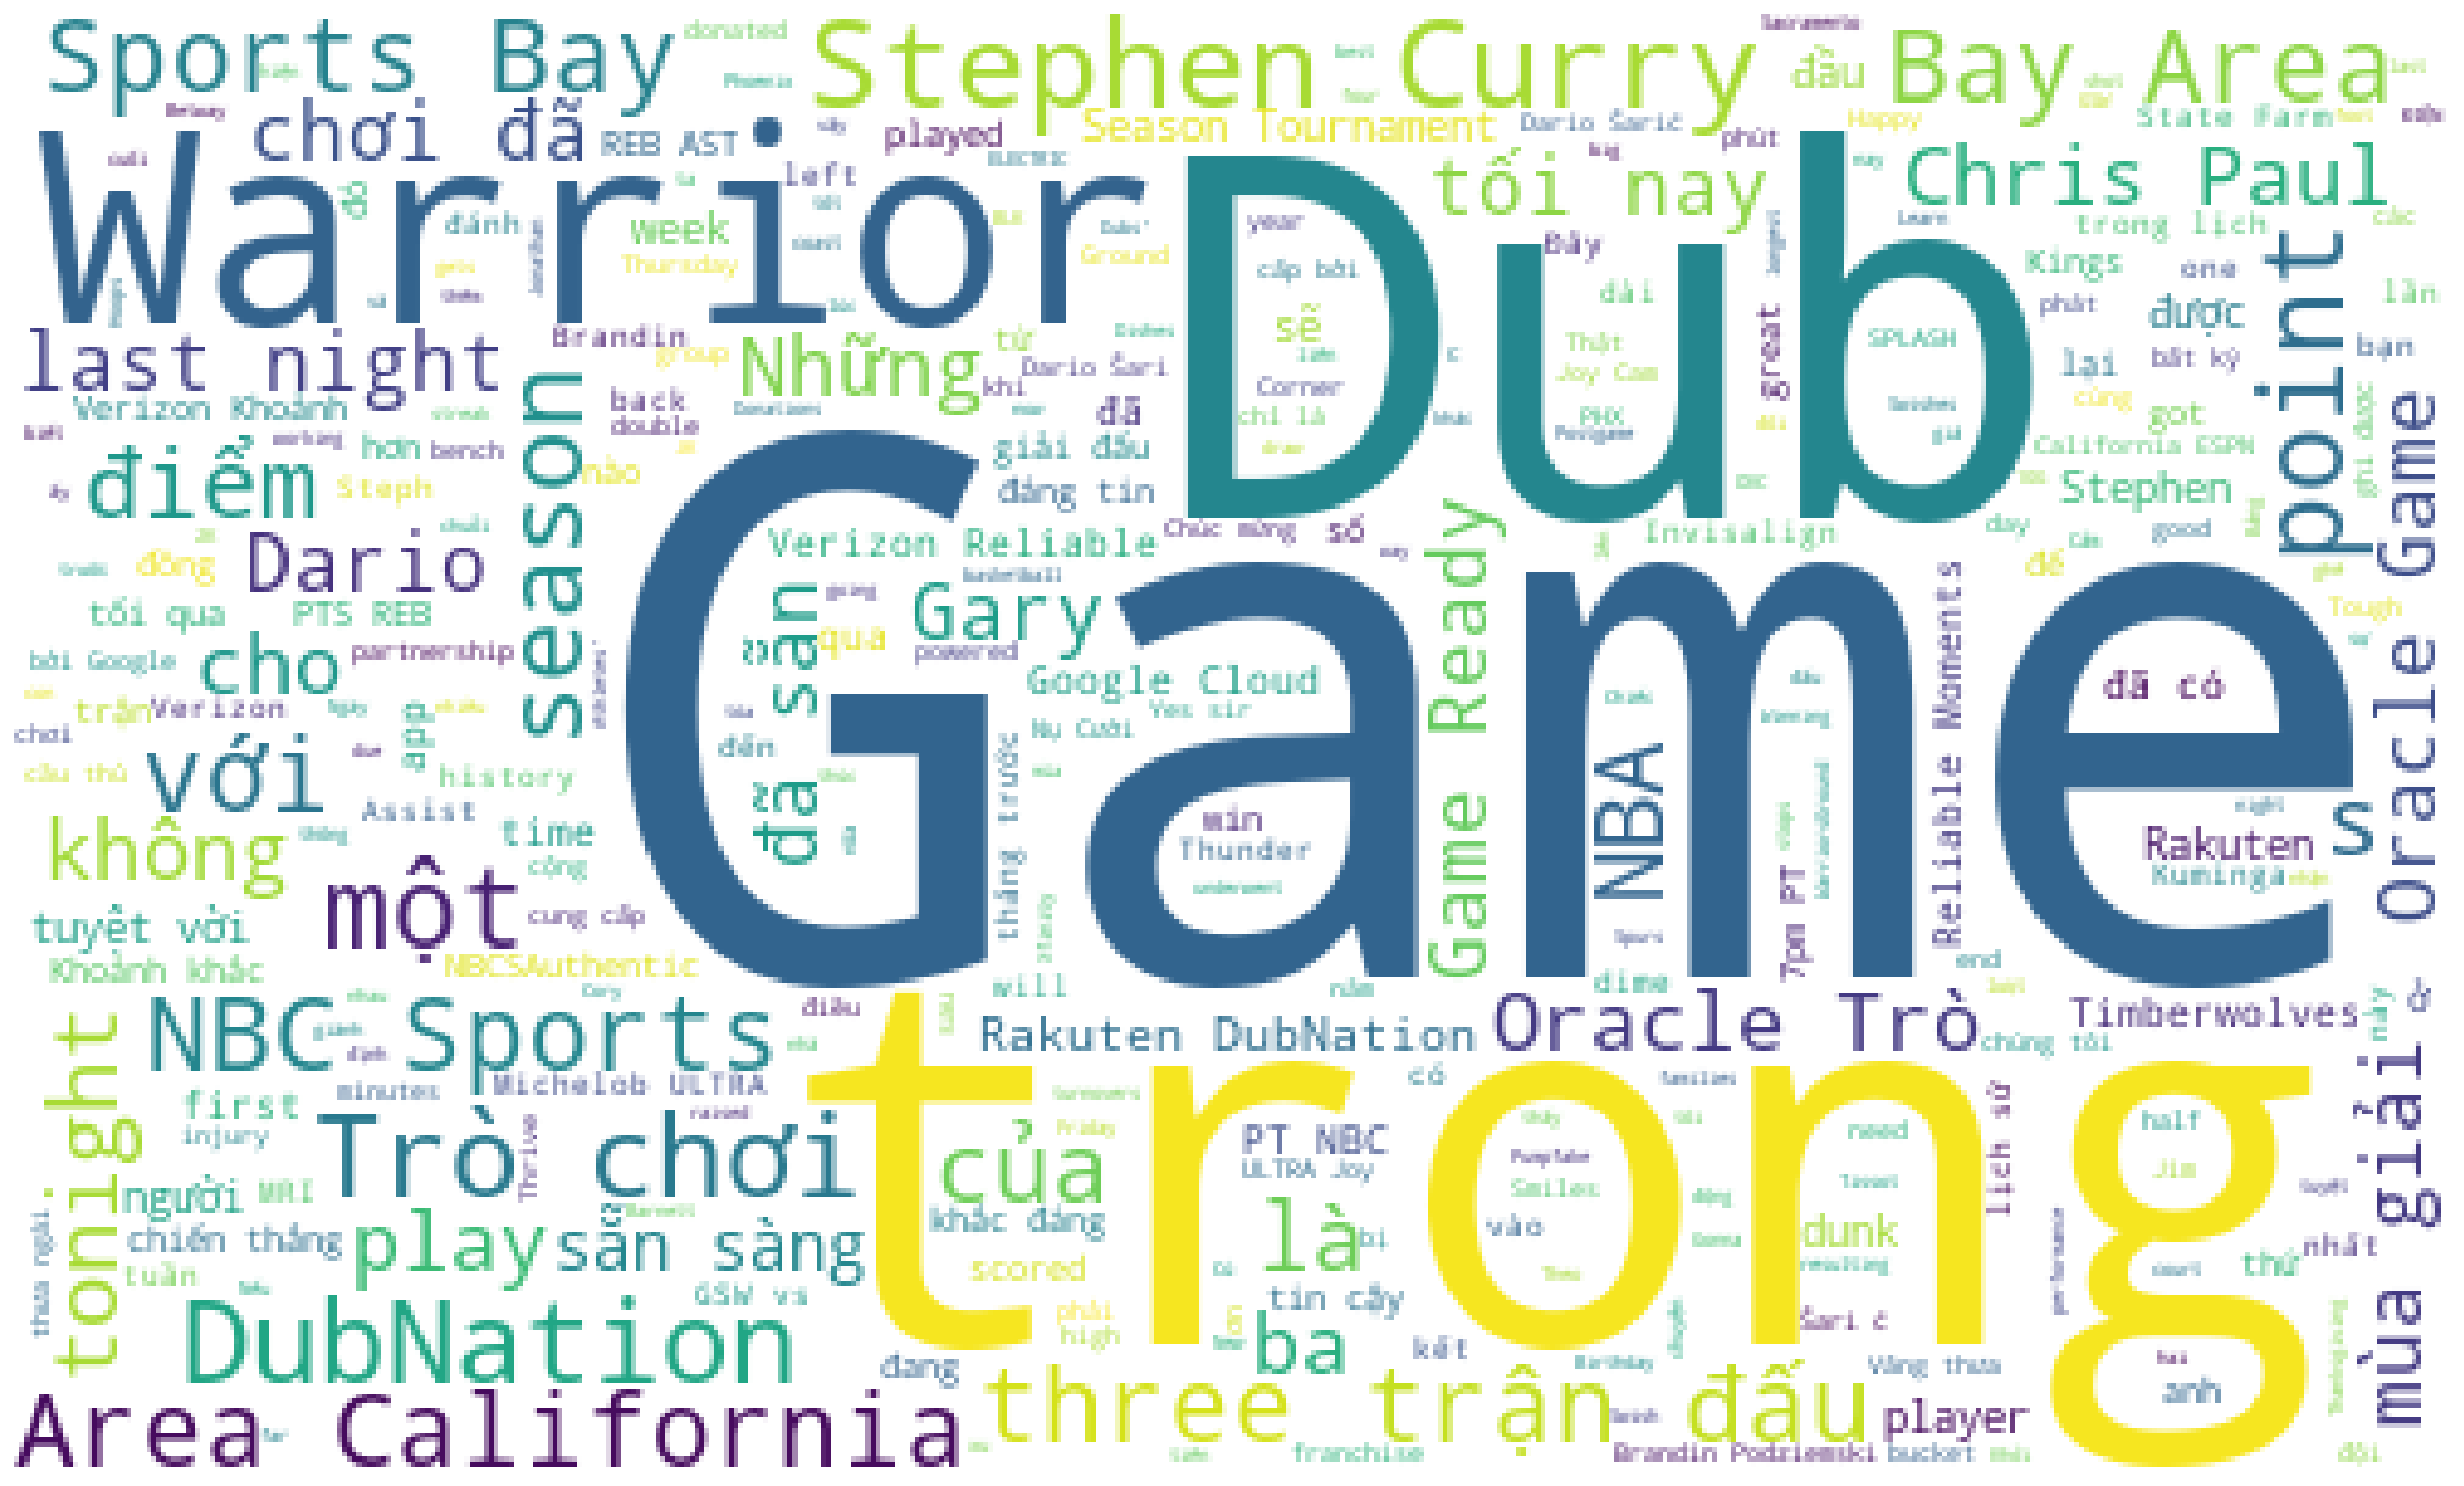

In [37]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Tìm keyword trong các bài đăng

In [38]:
text_fix=text 
print(len(text))
text

15203


'"He\'s a true hooper, so obviously he\'s going to be good at 2K" 👊\n\n@Ronnie2K takes on @Garydwayne\n\nWe Believe vs. 2016-17 - Who ya got?\n\n@NBA2K || 2K Challenge\nIn-Season Tournament matchup against the Kings is going to be a big one ☝️\n\nTrận đấu trong mùa giải đấu với các Kings sẽ là một trận đấu lớn ☝️\nThe Dubs have 44 dunks so far this season, resulting in $110,000 raised for the Warriors Community Foundation courtesy of Rakuten\n\nDunks for Donations || #DubNation\nPlay that back one time ▶️\n\nVerizon || Plays of the Week\n\nChơi lại lần đó ▶️\n\nVerizon || Những phát trong tuần\n"Yes, sir. Yes, sir. Yes, sir!"\n\nStephen Curry was mic\'d up earlier this year in Sacramento 🤣\n\nVâng, thưa ngài. Vâng, thưa ngài. Vâng, thưa ngài! "\n\nStephen Curry đã thức dậy sớm hơn năm nay ở Sacramento 🤣\nThe Dubs scored 354 points this week, meaning 35,400 meals were donated to families in need through our partnership with Kaiser Permanente Thrive and The Athletes\' Corner\n\nLearn mor

Cài đặt thư viện nltk để tìm stopwords

In [39]:
!pip install -U nltk
!pip install rake-nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dangv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dangv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dangv\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import tokenize
import math
from operator import itemgetter

In [42]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(text)
# r.get_ranked_phrases()
res_cach1=r.get_ranked_phrases_with_scores()
print(res_cach1)

[(958.5691667054568, 'last five games ⚡️ xfinity 10g network || game changers 20 đã ghi được hai chữ số trong 4 trong 5 trận đấu gần đây nhất của anh ⚡️ xfinity mạng 10g || người thay đổi trò chơi dishing dimes'), (712.402886002886, 'đã ở khắp nơi đêm qua cho dubs 📽️ postgame smiles hit different invisalign || winning smiles những nụ cười sau trò chơi khác biệt invisalign || nụ cười chiến thắng goodnight'), (585.8564754689754, 'bench feelin ’ good 👌 michelob ultra || joy cam cú đánh 3 điểm khiến ghế dài cảm thấy tốt 👌 michelob ultra || joy cam 2 ️⃣ 0 ️⃣ found'), (523.0516890516891, 'stephen sẽ không chơi trong trận đấu chống lại sấm sét vào thứ năm và sẽ được đánh giá lại vào một số thời điểm cuối tuần này'), (502.76903651903643, '2 ⃣ 2 ⃣ verizon || reliable moments mùa giải cao 31 điểm tối nay cho 2 ⃣ 2 ⃣ verizon || khoảnh khắc đáng tin cậy tough one'), (441.1083888333889, '4 kiến tạo và 2 lượt đánh cắp tối nay với giá 2 ️⃣ 0 ️⃣ verizon || khoảnh khắc đáng tin cậy fought'), (408.04461

In [43]:
def get_unique_numbers(numbers):
    unique = []

    for number in numbers:
        if number in unique:
            continue
        else:
            unique.append(number)
    return unique


stop_words=[i[1] for i in res_cach1]
stop_words.reverse()
stop_words=get_unique_numbers(a)
print(stop_words)

['"He\'s a true hooper, so obviously he\'s going to be good at 2K" 👊\n\n@Ronnie2K takes on @Garydwayne\n\nWe Believe vs. 2016-17 - Who ya got?\n\n@NBA2K || 2K Challenge', 'In-Season Tournament matchup against the Kings is going to be a big one ☝️\n\nTrận đấu trong mùa giải đấu với các Kings sẽ là một trận đấu lớn ☝️', 'The Dubs have 44 dunks so far this season, resulting in $110,000 raised for the Warriors Community Foundation courtesy of Rakuten\n\nDunks for Donations || #DubNation', 'Play that back one time ▶️\n\nVerizon || Plays of the Week\n\nChơi lại lần đó ▶️\n\nVerizon || Những phát trong tuần', '"Yes, sir. Yes, sir. Yes, sir!"\n\nStephen Curry was mic\'d up earlier this year in Sacramento 🤣\n\nVâng, thưa ngài. Vâng, thưa ngài. Vâng, thưa ngài! "\n\nStephen Curry đã thức dậy sớm hơn năm nay ở Sacramento 🤣', "The Dubs scored 354 points this week, meaning 35,400 meals were donated to families in need through our partnership with Kaiser Permanente Thrive and The Athletes' Corner\n\

In [44]:
for i in stop_words:
  text = text.replace(i,"")

Tìm số từ xuất hiện trong bộ dữ liệu    

In [45]:
total_words = text.split()
total_word_length = len(total_words)
print(total_word_length)

3


Tìm số câu xuất hiện trong bộ dữ liệu

In [46]:
total_sentences = tokenize.sent_tokenize(text)
total_sent_len = len(total_sentences)
print(total_sent_len) 

1


Tính số lần xuất hiện của một từ khóa

In [47]:
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
print(tf_score)

tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

print(tf_score)

{'from': 1, 'Warriors': 1, 'Ground': 1}
{'from': 0.3333333333333333, 'Warriors': 0.3333333333333333, 'Ground': 0.3333333333333333}


Lấy 10 từ quan trọng nhất trong các bài post

In [48]:
def check_sent(word, sentences):
    final = [all([w in x for w in word]) for x in sentences]
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))


#  Tính IDF cho mỗi từ
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

print(idf_score)

# tính kết quả là tích TF*IDF
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}
print(tf_idf_score)

{'from': 0.0, 'Warriors': 0.0, 'Ground': 0.0}
{'from': 0.0, 'Warriors': 0.0, 'Ground': 0.0}


In [49]:
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n])
    return result

from operator import itemgetter
get_top_n(tf_idf_score, 10)

{'from': 0.0, 'Warriors': 0.0, 'Ground': 0.0}

### Phân tích thời gian đăng bài và lượng reaction theo thời gian trong ngày

In [52]:
post_df_full['hour'] = post_df_full['time'].dt.hour

In [54]:
# tổng số bài đăng theo giờ
post_per_hour = post_df_full['hour'].value_counts()
post_per_hour = post_per_hour.reindex(range(24), fill_value=0)

post_per_hour

hour
0     12
1      5
2      6
3      3
4      6
5      3
6      5
7      5
8      9
9     11
10     9
11     9
12    10
13     8
14     3
15     0
16     0
17     0
18     0
19     3
20     4
21     5
22     1
23     3
Name: count, dtype: int64

In [55]:
# tổng số lượt reaction theo giờ
reactions_per_hour = post_df_full.groupby('hour')['reaction_count'].sum()
reactions_per_hour = reactions_per_hour.reindex(range(24), fill_value=0)

reactions_per_hour

hour
0     144148
1      19806
2      44984
3      52706
4      69383
5       7989
6      69540
7      44852
8      49707
9      91499
10     78999
11    182817
12    297762
13     86214
14     11287
15         0
16         0
17         0
18         0
19     19332
20     38734
21     87411
22      7439
23     27353
Name: reaction_count, dtype: int64

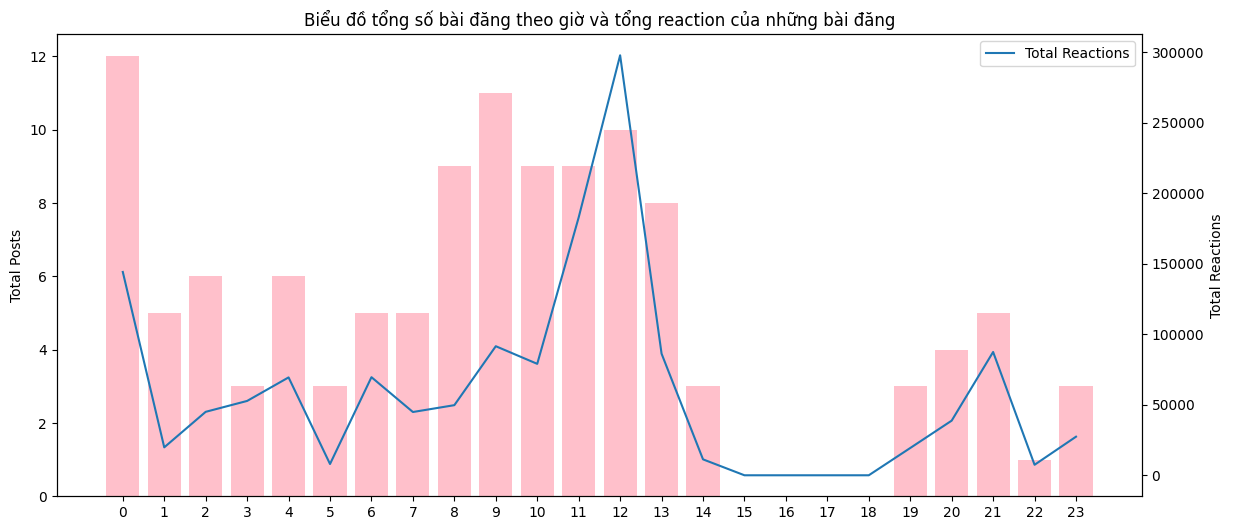

In [58]:
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.bar(post_per_hour.index, post_per_hour.values, color='pink', label='Total Posts')
ax1.set_ylabel('Total Posts')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.plot(reactions_per_hour.index, reactions_per_hour.values, label='Total Reactions')
ax2.set_xticks(reactions_per_hour.index)
ax2.set_xlabel('Hours')
ax2.set_ylabel('Total Reactions')
ax2.tick_params(axis='y')

plt.title('Biểu đồ tổng số bài đăng theo giờ và tổng reaction của những bài đăng')
plt.xlabel('Hours')
plt.legend()
plt.show()